# Unit root test simulation

Runs the Julia code from chapter 10 for the unit root test.  The first code block shows the rejection rate for the Dickey--Fuller test when the true data generating process is the nonlinear process specified in the function `h` and the size of the test is set to 0.05.  The code blocks below that compute the two related figures.

In [6]:
using PyPlot

N = 100           # Length of time series
alpha = 0.05      # Size of test
critical = -13.7  # Critical value for DF test of size 0.05
srand(123)        # Set random seed

function h(x, a=0.0, k=22, b=.16, q=0.6, m=10)
    return a + (k - a) / ((1 + q * exp(-b * (x - m)))^(1/q))
end

function dickey_fuller_stat(y)
    y1 = y[1:end-1]
    y2 = y[2:end]
    z2 = y2 - mean(y2)
    z1 = y1 - mean(y1)
    rho = dot(z1, z2) / dot(z1, z1)
    return length(y1) * (rho - 1)
end

function sim_dgp(N) 
    y = Array(Float64, N)
    y[1] = 8  # Initial value of unemployment rate
    for i in 1:N-1
        y[i+1] = h(y[i]) + 0.5 *randn()
    end 
    return y
end

M = 5000
rejections = 0 
for m in 1:M 
    y = sim_dgp(N)
    rejections += (dickey_fuller_stat(y) < critical)
end
println("Fraction under critical value: ", rejections / M)


Fraction under critical value: 0.0474


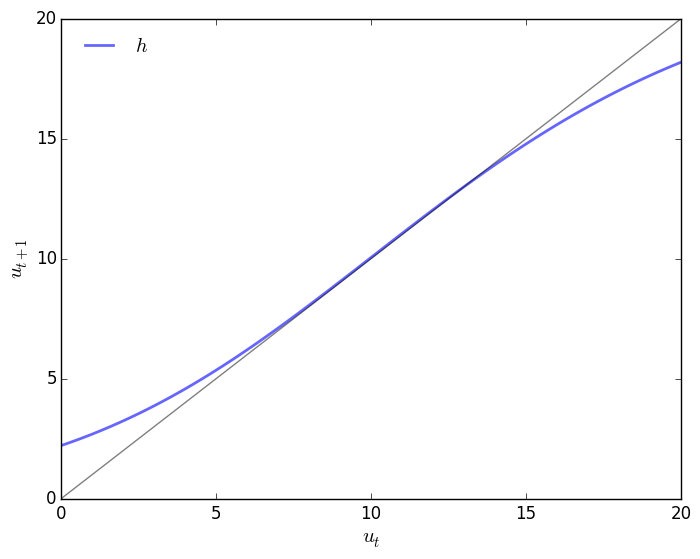

PyObject <matplotlib.text.Text object at 0x7f13291467d0>

In [7]:
function plot_g()
    xgrid = linspace(0, 20, 120)
    y = [h(x) for x in xgrid]
    fig, ax = subplots()
    ax[:plot](xgrid, y, lw=2, alpha=0.6, label=L"$h$")
    ax[:plot](xgrid, xgrid, "k-", lw=1, alpha=0.5)
    ax[:legend](loc="upper left", frameon=0)
    ax[:set_xlabel](L"$u_t$", fontsize=15)
    ax[:set_ylabel](L"$u_{t+1}$", fontsize=15)
end
plot_g()

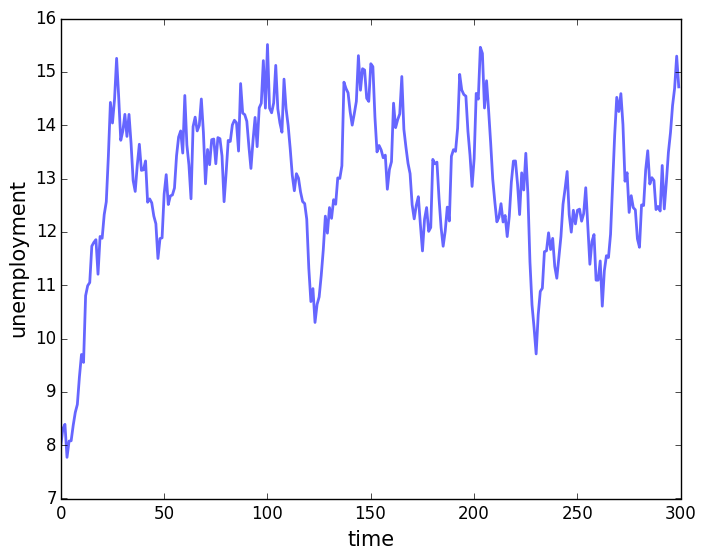

PyObject <matplotlib.text.Text object at 0x7f1329063ed0>

In [8]:
function plot_ts(n)
    y = sim_dgp(n)
    fig, ax = subplots()
    ax[:plot](y, lw=2, alpha=0.6)
    ax[:set_ylabel]("unemployment", fontsize=15)
    ax[:set_xlabel]("time", fontsize=15)
end
plot_ts(300)